# Cosine and Modified Cosine Similarity Compuation

In [1]:
import os
from matchms.importing import load_from_mgf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load the data (Here I am loading data which is already clusterd)
# Dropbox path: ReviveMed/ReviveMed Team Folder/Revivemed_LCMS2_Chetan/data
file_mgf = "./data/UM001_clustered.mgf"
spectrums = list(load_from_mgf(file_mgf))
print(f"Length of Spectrum {len(spectrums)}")

Length of Spectrum 8454


In [9]:
# Taking subset of data
spectrums = spectrums[0:100]

Text(0, 0.5, 'Number of spectra')

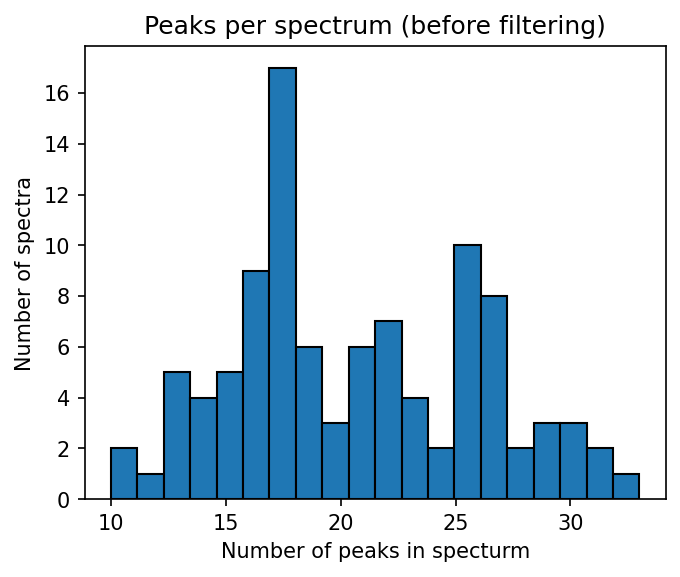

In [10]:
# Number of peaks in the spectra
number_of_peaks = [len(s.peaks.mz) for s in spectrums]

plt.figure(figsize=(5,4), dpi=150)
plt.hist(number_of_peaks, 20, edgecolor="black")
plt.title("Peaks per spectrum (before filtering)")
plt.xlabel("Number of peaks in specturm")
plt.ylabel("Number of spectra")

In [11]:
# Data Processing
from matchms.filtering import default_filters
from matchms.filtering import repair_inchi_inchikey_smiles
from matchms.filtering import derive_inchikey_from_inchi
from matchms.filtering import derive_smiles_from_inchi
from matchms.filtering import derive_inchi_from_smiles
from matchms.filtering import harmonize_undefined_inchi
from matchms.filtering import harmonize_undefined_inchikey
from matchms.filtering import harmonize_undefined_smiles
def metadata_processing(spectrum):
    spectrum = default_filters(spectrum)
    spectrum = repair_inchi_inchikey_smiles(spectrum)
    spectrum = derive_inchi_from_smiles(spectrum)
    spectrum = derive_smiles_from_inchi(spectrum)
    spectrum = derive_inchikey_from_inchi(spectrum)
    spectrum = harmonize_undefined_smiles(spectrum)
    spectrum = harmonize_undefined_inchi(spectrum)
    spectrum = harmonize_undefined_inchikey(spectrum)
    return spectrum

In [12]:
# Peaks Processing
from matchms.filtering import default_filters
from matchms.filtering import normalize_intensities
from matchms.filtering import select_by_intensity
from matchms.filtering import select_by_mz
def peak_processing(spectrum):
    spectrum = default_filters(spectrum)
    spectrum = normalize_intensities(spectrum)
    spectrum = select_by_intensity(spectrum, intensity_from=0.01)
    spectrum = select_by_mz(spectrum, mz_from=10, mz_to=1000)
    return spectrum

In [13]:
'''defined a sequence of filters which will normalize the intensities to values between 0 and 1,
and finally only keep peaks if they have a normalized intensity > 0.01 and if they have a m/z position
between 10 and 1000 Da'''

# Applying processing sequence to the spectrums
spectrums = [metadata_processing(s) for s in spectrums]
spectrums = [peak_processing(s) for s in spectrums]

No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in metadata.
No compound name found in me

Text(0, 0.5, 'Number of spectra')

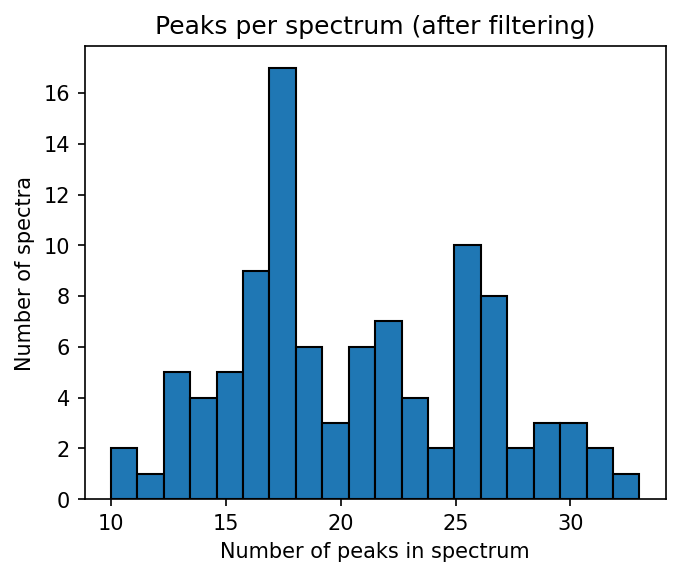

In [14]:
# Plotting number of peaks after processing
number_of_peaks = [len(s.peaks.mz) for s in spectrums]

plt.figure(figsize=(5,4), dpi=150)
plt.hist(number_of_peaks, 20, edgecolor="black")
plt.title("Peaks per spectrum (after filtering)")
plt.xlabel("Number of peaks in spectrum")
plt.ylabel("Number of spectra")

## Computing Cosine Similarity

In [20]:
from matchms import calculate_scores
from matchms.similarity import CosineGreedy

# Computing cosine similarity
similarity_measure = CosineGreedy(tolerance=0.005)
scores = calculate_scores(spectrums, spectrums, similarity_measure, is_symmetric=True)

Text(0, 0.5, 'Spectrum #ID')

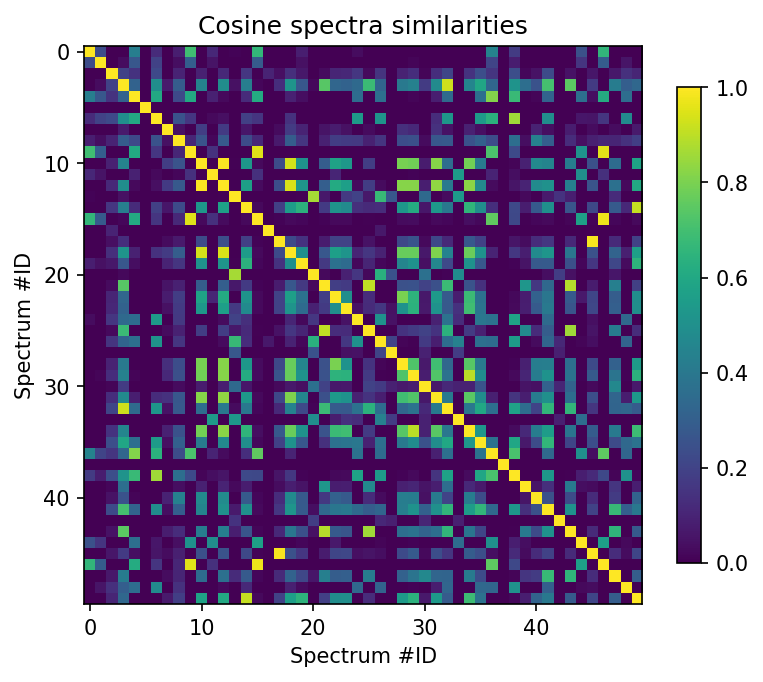

In [19]:
# Visualizing first 50x50 scores matrix
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(scores.scores[:50, :50]["score"], cmap="viridis")
plt.colorbar(shrink=0.7)
plt.title("Cosine spectra similarities")
plt.xlabel("Spectrum #ID")
plt.ylabel("Spectrum #ID")

## Computing Cosine Similarity

In [21]:
%%time
from matchms.similarity import ModifiedCosine

# Computing modified cosine similarity
similarity_measure = ModifiedCosine(tolerance=0.005)
scores = calculate_scores(spectrums, spectrums, similarity_measure, is_symmetric=True)

Wall time: 544 ms


Text(0, 0.5, 'Spectrum #ID')

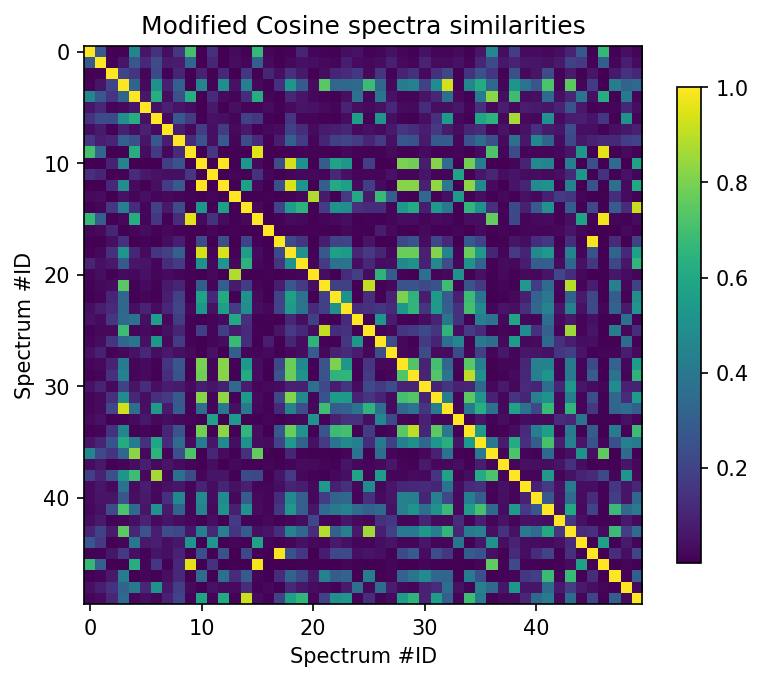

In [22]:
# Visualizing first 50x50 scores matrix
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(scores.scores[:50, :50]["score"], cmap="viridis")
plt.colorbar(shrink=0.7)
plt.title("Modified Cosine spectra similarities")
plt.xlabel("Spectrum #ID")
plt.ylabel("Spectrum #ID")